In [25]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from pprint import pprint

In [26]:
url = 'https://api.covidtracking.com/v1/states/mi/daily.json'
response = (requests.get(url).json())

In [63]:
covid_df = pd.DataFrame(response)
covid_df.dropna(axis=1, how='all', inplace = True)
covid_df

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20200923,MI,131259,3293848.0,NaN,3425107,501.0,146.0,58.0,90216.0,...,3425107,16,0,31f3951f689d05d3416dabd37842d31d1ba026b8,0,0,0,0,0,
1,20200922,MI,130357,3260521.0,NaN,3390878,501.0,146.0,56.0,90216.0,...,3390878,16,0,d9ea925bffd34bd7ae8bc315c33a56167d99ea05,0,0,0,0,0,
2,20200921,MI,129662,3241005.0,NaN,3370667,501.0,146.0,64.0,90216.0,...,3370667,12,0,e9011c38da4499931fd6b69bc0d67a537867c520,0,0,0,0,0,
3,20200920,MI,128087,3190382.0,NaN,3318469,557.0,150.0,64.0,90216.0,...,3318469,0,0,696c50a64c4e55f0a730a5edf8659e1159f2ed4a,0,0,0,0,0,
4,20200919,MI,128087,3190382.0,NaN,3318469,557.0,150.0,64.0,90216.0,...,3318469,15,0,953602ddfb868cd34b3fc0502112f9a0cbe31348,0,0,0,0,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,20200305,MI,100,8.0,NaN,108,NaN,NaN,NaN,NaN,...,108,0,0,e6a201a048b0a2c1f7c38351715bee9fed92480d,0,0,0,0,0,
203,20200304,MI,74,NaN,NaN,74,NaN,NaN,NaN,NaN,...,74,0,0,6580caa6f6ad47e4773cb971727bf8657c1acd25,0,0,0,0,0,
204,20200303,MI,50,NaN,NaN,50,NaN,NaN,NaN,NaN,...,50,0,0,6d861c1a4593a3bbdddc27a097d0c8c5c2ab7000,0,0,0,0,0,
205,20200302,MI,27,NaN,NaN,27,NaN,NaN,NaN,NaN,...,27,0,0,885053baf642426d9937c11d8706b58c94506581,0,0,0,0,0,


In [64]:
covid_dates = [datetime.date(int(str(x)[0:4]), int(str(x)[5]), int(str(x)[6:8])) for x in covid_df['date']]
covid_df['datetimes']=covid_dates
covid_df.head()

,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered,...,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade,datetimes
0,20200923,MI,131259,3293848.0,NaN,3425107,501.0,146.0,58.0,90216.0,...,16,0,31f3951f689d05d3416dabd37842d31d1ba026b8,0,0,0,0,0,,2020-09-23
1,20200922,MI,130357,3260521.0,NaN,3390878,501.0,146.0,56.0,90216.0,...,16,0,d9ea925bffd34bd7ae8bc315c33a56167d99ea05,0,0,0,0,0,,2020-09-22
2,20200921,MI,129662,3241005.0,NaN,3370667,501.0,146.0,64.0,90216.0,...,12,0,e9011c38da4499931fd6b69bc0d67a537867c520,0,0,0,0,0,,2020-09-21
3,20200920,MI,128087,3190382.0,NaN,3318469,557.0,150.0,64.0,90216.0,...,0,0,696c50a64c4e55f0a730a5edf8659e1159f2ed4a,0,0,0,0,0,,2020-09-20
4,20200919,MI,128087,3190382.0,NaN,3318469,557.0,150.0,64.0,90216.0,...,15,0,953602ddfb868cd34b3fc0502112f9a0cbe31348,0,0,0,0,0,,2020-09-19


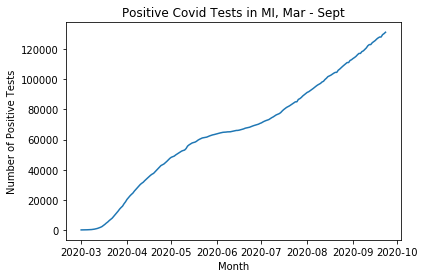

In [70]:
plt.plot(covid_df['datetimes'], covid_df['positive'])
plt.title('Positive Covid Tests in MI, Mar - Sept')
plt.ylabel('Number of Positive Tests')
plt.xlabel('Month')
plt.show()

In [71]:
emp_comb_path = 'Resources/Employment Combined - State - Daily.csv'

emp_comb_df = pd.read_csv(emp_comb_path)
mi_emp_comb_df = emp_comb_df.loc[emp_comb_df['statefips']==26]
mi_emp_comb_df

,year,month,day,statefips,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70
22,2020,1,15,26,-0.001230,-.000268,-.00115,-0.00255,-.000196,-.00234,.000193,-.00555
73,2020,1,16,26,-0.000679,.000682,-.000624,-0.00245,-.000276,-.0022,.000653,-.00418
124,2020,1,17,26,-0.000132,.00163,-.0000949,-0.00235,-.000307,-.00203,.00112,-.00278
175,2020,1,18,26,0.000427,.00262,.000434,-0.00226,-.000312,-.00186,.00164,-.00117
226,2020,1,19,26,0.000985,.00361,.000963,-0.00216,-.000317,-.00169,.00215,.000433
...,...,...,...,...,...,...,...,...,...,...,...,...
9814,2020,7,25,26,-0.063600,-.179,-.0343,0.01490,-.0696,-.0566,-.106,-.101
9865,2020,7,26,26,-0.063500,-.179,-.034,0.01440,-.0693,-.0559,-.107,-.101
9916,2020,7,27,26,-0.063500,-.179,-.0336,0.01390,-.069,-.0551,-.107,-.0997
9967,2020,7,28,26,-0.063500,-.179,-.0333,0.01340,-.0688,-.0544,-.107,-.0988


In [72]:
mi_emp_comb_df.loc[:, 'emp_combined'] *= 100
mi_emp_comb_df.style.format({'emp_combined': '{0:,.5f}%'})

C:\Users\state\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,year,month,day,statefips,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70
22,2020,1,15,26,-0.12300%,-.000268,-.00115,-0.002550,-.000196,-.00234,.000193,-.00555
73,2020,1,16,26,-0.06790%,.000682,-.000624,-0.002450,-.000276,-.0022,.000653,-.00418
124,2020,1,17,26,-0.01320%,.00163,-.0000949,-0.002350,-.000307,-.00203,.00112,-.00278
175,2020,1,18,26,0.04270%,.00262,.000434,-0.002260,-.000312,-.00186,.00164,-.00117
226,2020,1,19,26,0.09850%,.00361,.000963,-0.002160,-.000317,-.00169,.00215,.000433
277,2020,1,20,26,0.15400%,.0046,.00149,-0.002070,-.000322,-.00152,.00267,.00204
328,2020,1,21,26,0.20500%,.00539,.00202,-0.001970,-.000369,-.00136,.00313,.00331
379,2020,1,22,26,0.25500%,.00618,.00255,-0.001870,-.000388,-.00118,.00358,.00452
430,2020,1,23,26,0.26000%,.00595,.00252,-0.001320,-.000475,-.000452,.00355,.00498
481,2020,1,24,26,0.26100%,.00558,.00249,-0.000773,-.000606,.000234,.00348,.00538


In [73]:
date = []
per_change = []
for index in mi_emp_comb_df.index:
    date.append(datetime.date(mi_emp_comb_df.loc[index, 'year'],mi_emp_comb_df.loc[index, 'month'],mi_emp_comb_df.loc[index, 'day']))
    per_change.append(mi_emp_comb_df.loc[index, 'emp_combined'])
mi_emp_comb_df['datetimes'] = date
mi_emp_comb_df



#str(mi_emp_comb_df.loc[x,'year'])+ '0'+str(mi_emp_comb_df.loc[x,'month'])

C:\Users\state\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,year,month,day,statefips,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70,datetimes
22,2020,1,15,26,-0.1230,-.000268,-.00115,-0.00255,-.000196,-.00234,.000193,-.00555,2020-01-15
73,2020,1,16,26,-0.0679,.000682,-.000624,-0.00245,-.000276,-.0022,.000653,-.00418,2020-01-16
124,2020,1,17,26,-0.0132,.00163,-.0000949,-0.00235,-.000307,-.00203,.00112,-.00278,2020-01-17
175,2020,1,18,26,0.0427,.00262,.000434,-0.00226,-.000312,-.00186,.00164,-.00117,2020-01-18
226,2020,1,19,26,0.0985,.00361,.000963,-0.00216,-.000317,-.00169,.00215,.000433,2020-01-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9814,2020,7,25,26,-6.3600,-.179,-.0343,0.01490,-.0696,-.0566,-.106,-.101,2020-07-25
9865,2020,7,26,26,-6.3500,-.179,-.034,0.01440,-.0693,-.0559,-.107,-.101,2020-07-26
9916,2020,7,27,26,-6.3500,-.179,-.0336,0.01390,-.069,-.0551,-.107,-.0997,2020-07-27
9967,2020,7,28,26,-6.3500,-.179,-.0333,0.01340,-.0688,-.0544,-.107,-.0988,2020-07-28


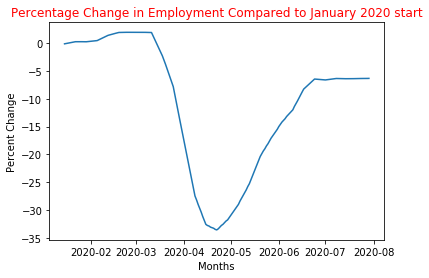

In [74]:
x_values = date
y_values = per_change


plt.plot(x_values, y_values)
plt.xlabel('Months')
plt.ylabel('Percent Change')
plt.title('Percentage Change in Employment Compared to January 2020 start', color = 'red')
plt.show()



In [75]:
for x in covid_df['datetimes']:
    print(x)

2020-09-23
2020-09-22
2020-09-21
2020-09-20
2020-09-19
2020-09-18
2020-09-17
2020-09-16
2020-09-15
2020-09-14
2020-09-13
2020-09-12
2020-09-11
2020-09-10
2020-09-09
2020-09-08
2020-09-07
2020-09-06
2020-09-05
2020-09-04
2020-09-03
2020-09-02
2020-09-01
2020-08-31
2020-08-30
2020-08-29
2020-08-28
2020-08-27
2020-08-26
2020-08-25
2020-08-24
2020-08-23
2020-08-22
2020-08-21
2020-08-20
2020-08-19
2020-08-18
2020-08-17
2020-08-16
2020-08-15
2020-08-14
2020-08-13
2020-08-12
2020-08-11
2020-08-10
2020-08-09
2020-08-08
2020-08-07
2020-08-06
2020-08-05
2020-08-04
2020-08-03
2020-08-02
2020-08-01
2020-07-31
2020-07-30
2020-07-29
2020-07-28
2020-07-27
2020-07-26
2020-07-25
2020-07-24
2020-07-23
2020-07-22
2020-07-21
2020-07-20
2020-07-19
2020-07-18
2020-07-17
2020-07-16
2020-07-15
2020-07-14
2020-07-13
2020-07-12
2020-07-11
2020-07-10
2020-07-09
2020-07-08
2020-07-07
2020-07-06
2020-07-05
2020-07-04
2020-07-03
2020-07-02
2020-07-01
2020-06-30
2020-06-29
2020-06-28
2020-06-27
2020-06-26
2020-06-25

In [90]:
covid_emp_merge = pd.merge(covid_df, mi_emp_comb_df, on='datetimes', how = 'inner')
covid_emp_merge





,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered,...,day,statefips,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70
0,20200729,MI,88974,1704259.0,NaN,1793233,670.0,195.0,135.0,57502.0,...,29,26,-6.34,-.179,-.033,0.0128,-.0685,-.0537,-.107,-.098
1,20200728,MI,87958,1639924.0,NaN,1727882,670.0,195.0,135.0,57502.0,...,28,26,-6.35,-.179,-.0333,0.0134,-.0688,-.0544,-.107,-.0988
2,20200727,MI,87173,1613316.0,NaN,1700489,670.0,195.0,113.0,57502.0,...,27,26,-6.35,-.179,-.0336,0.0139,-.069,-.0551,-.107,-.0997
3,20200726,MI,86661,1584083.0,NaN,1670744,680.0,210.0,113.0,57502.0,...,26,26,-6.35,-.179,-.034,0.0144,-.0693,-.0559,-.107,-.101
4,20200725,MI,85072,1529574.0,NaN,1614646,751.0,215.0,113.0,55162.0,...,25,26,-6.36,-.179,-.0343,0.0149,-.0696,-.0566,-.106,-.101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,20200305,MI,100,8.0,NaN,108,NaN,NaN,NaN,NaN,...,5,26,1.95,.0111,.0214,0.0258,.00768,.0243,.0101,.0276
147,20200304,MI,74,NaN,NaN,74,NaN,NaN,NaN,NaN,...,4,26,1.95,.0117,.0209,0.0260,.00776,.0249,.00985,.0275
148,20200303,MI,50,NaN,NaN,50,NaN,NaN,NaN,NaN,...,3,26,1.95,.0118,.0207,0.0263,.00766,.0246,.0098,.0286
149,20200302,MI,27,NaN,NaN,27,NaN,NaN,NaN,NaN,...,2,26,1.96,.0119,.0206,0.0267,.00754,.0243,.00977,.0297


,date,state,positive,negative,pending,totalTestResults,hospitalizedCurrently,inIcuCurrently,onVentilatorCurrently,recovered,...,day,statefips,emp_combined,emp_combined_inclow,emp_combined_incmiddle,emp_combined_inchigh,emp_combined_ss40,emp_combined_ss60,emp_combined_ss65,emp_combined_ss70
0,20200923,MI,131259,3293848.0,NaN,3425107,501.0,146.0,58.0,90216.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20200922,MI,130357,3260521.0,NaN,3390878,501.0,146.0,56.0,90216.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20200921,MI,129662,3241005.0,NaN,3370667,501.0,146.0,64.0,90216.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20200920,MI,128087,3190382.0,NaN,3318469,557.0,150.0,64.0,90216.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20200919,MI,128087,3190382.0,NaN,3318469,557.0,150.0,64.0,90216.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,20200305,MI,100,8.0,NaN,108,NaN,NaN,NaN,NaN,...,5.0,26.0,1.95,.0111,.0214,0.0258,.00768,.0243,.0101,.0276
203,20200304,MI,74,NaN,NaN,74,NaN,NaN,NaN,NaN,...,4.0,26.0,1.95,.0117,.0209,0.0260,.00776,.0249,.00985,.0275
204,20200303,MI,50,NaN,NaN,50,NaN,NaN,NaN,NaN,...,3.0,26.0,1.95,.0118,.0207,0.0263,.00766,.0246,.0098,.0286
205,20200302,MI,27,NaN,NaN,27,NaN,NaN,NaN,NaN,...,2.0,26.0,1.96,.0119,.0206,0.0267,.00754,.0243,.00977,.0297
